In [158]:
# Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import polars as pl
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import ee
import PIL
import urllib
import cv2
from IPython.display import Image


In [10]:
# Visualization set
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

In [11]:
# Opening vector map
shp_path = "../data/shp/Tuberias.shp"
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

In [6]:
len(sf.shapes())

35670

In [7]:
# Convert shp to dataframe
def shp_to_df(sf):
    # Column names
    fields = [x[0] for x in sf.fields][1:]

    # Column values and coordinates
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]

    # Dataframe
    df = pl.DataFrame(data = records, schema = fields, orient = "row")

    # Column of coordinates
    df = df.with_columns(pl.Series("coords", values = shps))
    return df


In [8]:
df = shp_to_df(sf)
df.shape

(35670, 28)

In [9]:
df.head()

OBJECTID,FACILITYID,INSTALLDAT,MATERIAL,DIAMETER,WATERTYPE,TRANSMISS,ENABLED,ACTIVEFLAG,OWNEDBY,MAINTBY,LASTUPDATE,LASTEDITOR,GlobalID,terrain_el,depth,Elevation,Observacio,TipoRed,LocDesc,Condition,Estado,Cota_ini,Cota_fin,OrigenDato,Shape_Leng,ID_Origina,coords
i64,str,date,str,f64,str,str,i64,i64,i64,i64,date,str,str,f64,f64,f64,str,str,str,str,str,f64,f64,str,f64,i64,object
68238,"""TU-1""",1990-01-01,"""PVC""",8.0,"""Potable""","""""",0,0,0,0,2017-05-25,"""LAPTOP-EE3IC9B...","""{5CA23AB7-6AA4...",0.0,0.0,0.0,"""""","""Primaria""","""CAMINO;""","""Desconocido""","""EXIST""",1926.5,1932.5,"""MapaViejo""",313.600785,7471,"[(783554.1499037556, 2419813.8500305936), (783693.6486405022, 2419880.6858549267), (783758.5477889217, 2419919.445619926), (783816.7008878365, 2419967.956677757), (783822.2763360031, 2419972.607915178), (783822.3101285882, 2419972.6098836735), (783822.5401150025, 2419972.6098836735), (783822.6099967547, 2419972.6098836735)]"
68239,"""TU-2""",1990-01-01,"""PVC""",12.0,"""Potable""","""""",0,0,0,0,null,"""""","""{882F60C5-E75D...",0.0,0.0,0.0,"""""","""Primaria""","""CAMINO;""","""Desconocido""","""EXIST""",1932.5,1932.5,"""MapaViejo""",47.16989,15758,"[(783822.6099967547, 2419972.6098836735), (783822.6099967547, 2419972.709949091), (783822.6090125032, 2419972.793938428), (783808.8498536721, 2420017.7200296745)]"
68240,"""TU-3""",1990-01-01,"""PVC""",12.0,"""Potable""","""""",0,0,0,0,null,"""""","""{561EF53D-ACD6...",0.0,0.0,0.0,"""""","""Primaria""","""CAMINO;""","""Desconocido""","""EXIST""",1944.0,1932.5,"""MapaViejo""",289.838247,7468,"[(783905.2098971717, 2419694.809914343), (783905.1583880857, 2419694.9293366745), (783867.812662255, 2419815.9356563464), (783822.6155741699, 2419972.4376399294), (783822.6099967547, 2419972.6098836735)]"
68241,"""TU-4""",1990-01-01,"""PVC""",3.0,"""Potable""","""""",0,0,0,0,null,"""""","""{2841CBAF-1D2B...",0.0,0.0,0.0,"""""","""Secundaria""","""CAMINO;""","""Desconocido""","""EXIST""",1913.0,1913.5,"""MapaViejo""",16.737326,7716,"[(783829.1900360882, 2420558.909892179), (783813.1798975021, 2420554.0299806744)]"
68242,"""TU-5""",1990-01-01,"""PVC""",3.0,"""Potable""","""""",0,0,0,0,null,"""""","""{DDADC82B-ABB5...",0.0,0.0,0.0,"""""","""Secundaria""","""CAMINO;""","""Desconocido""","""EXIST""",1913.0,1912.5,"""MapaViejo""",18.296629,7717,"[(783829.1900360882, 2420558.909892179), (783846.6900010854, 2420564.2501045913)]"


In [8]:
def plot_shape(id, s=None):
    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
#storing the id number to be worked upon
    shape_ex = sf.shape(id)
#NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

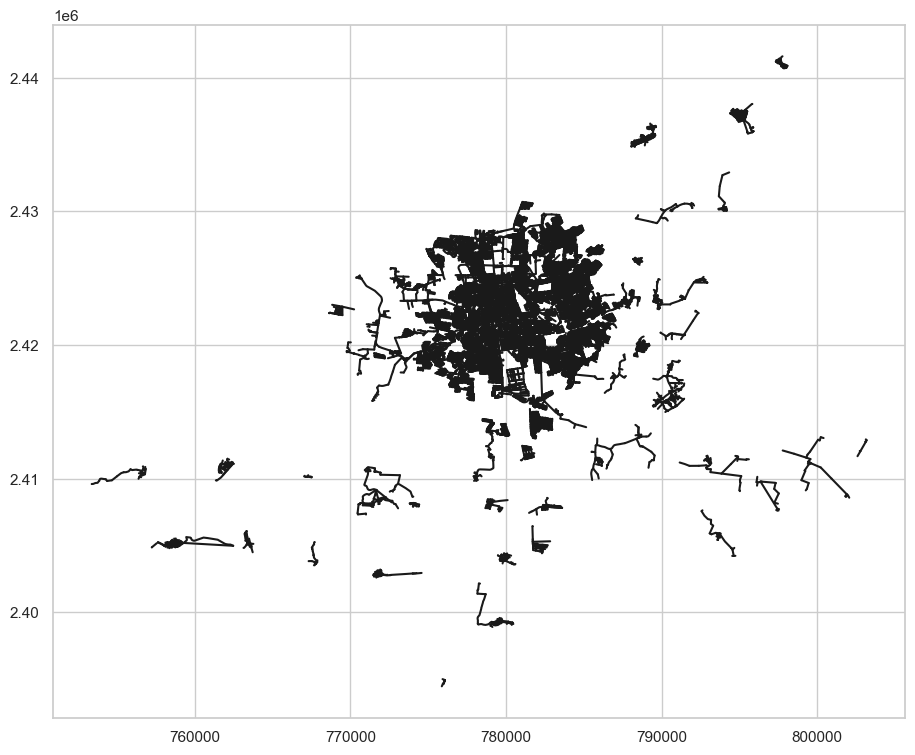

In [9]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            # plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#calling the function and passing required parameters to plot the full map
plot_map(sf)

In [12]:
fp = "../data/shp/Tuberias.shp"

map_df = gpd.read_file(fp)
map_df.head()

,OBJECTID,FACILITYID,INSTALLDAT,MATERIAL,DIAMETER,WATERTYPE,TRANSMISS,ENABLED,ACTIVEFLAG,OWNEDBY,...,TipoRed,LocDesc,Condition,Estado,Cota_ini,Cota_fin,OrigenDato,Shape_Leng,ID_Origina,geometry
0,68238,TU-1,1990-01-01,PVC,8.0,Potable,NaN,0,0,0,...,Primaria,CAMINO;,Desconocido,EXIST,1926.5,1932.5,MapaViejo,313.600785,7471,"LINESTRING (783554.150 2419813.850, 783693.649..."
1,68239,TU-2,1990-01-01,PVC,12.0,Potable,NaN,0,0,0,...,Primaria,CAMINO;,Desconocido,EXIST,1932.5,1932.5,MapaViejo,47.169890,15758,"LINESTRING (783822.610 2419972.610, 783822.610..."
2,68240,TU-3,1990-01-01,PVC,12.0,Potable,NaN,0,0,0,...,Primaria,CAMINO;,Desconocido,EXIST,1944.0,1932.5,MapaViejo,289.838247,7468,"LINESTRING (783905.210 2419694.810, 783905.158..."
3,68241,TU-4,1990-01-01,PVC,3.0,Potable,NaN,0,0,0,...,Secundaria,CAMINO;,Desconocido,EXIST,1913.0,1913.5,MapaViejo,16.737326,7716,"LINESTRING (783829.190 2420558.910, 783813.180..."
4,68242,TU-5,1990-01-01,PVC,3.0,Potable,NaN,0,0,0,...,Secundaria,CAMINO;,Desconocido,EXIST,1913.0,1912.5,MapaViejo,18.296629,7717,"LINESTRING (783829.190 2420558.910, 783846.690..."


In [59]:
coodernadas = map_df["geometry"]
longitude = []
latitude = []

for i in range(map_df.shape[0]):
    longitude.append(coodernadas[i].coords[0][0])
    latitude.append(coodernadas[i].coords[0][1])

map_df["longitude"] = longitude
map_df["latitude"] = latitude
map_df.shape


(35670, 30)

In [77]:
map_df_trim = map_df.query("770000 < longitude < 790000")
map_df_trim = map_df_trim.query("2410000 < latitude < 2430000")
map_df_trim.shape

(33726, 30)

Text(0.5, 1.0, 'Tuberías')

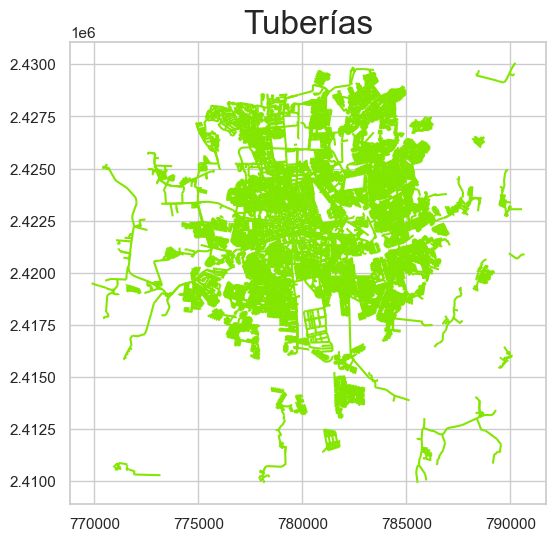

In [97]:
map_df_trim.plot(color = "#83e600")
plt.title("Tuberías", 
          fontsize = 24)

# Leak mapping

In [79]:
# Pipe leak location
leaks = pd.read_excel("../data/raw/Ordenes Fugas Ejecutadas Dic2022 XY.xlsx")
leaks.shape

(1922, 11)

In [80]:
leaks.head()

,Id,FECHA DE CREACIÓN,FECHA DE INICIO,FECHA FINAL,CODUNIDAD,FECHALEGALIZACION,NOMBREESTADO,NOMBRETRABAJO,CAUSAL,X,Y
0,1,2021-10-14,2022-11-24,2022-12-07,757,2022-12-07,Cerrada,FTA - FUGA EN TOMA DE AGUA,SE CANCELA,781021.888082,2.428227e+06
1,2,2021-09-28,2022-11-24,2022-12-07,757,2022-12-07,Cerrada,FTA - FUGA EN TOMA DE AGUA,SE CANCELA,778394.890320,2.426703e+06
2,3,2022-03-30,2022-11-24,2022-11-26,757,2022-12-22,Cerrada,FTA - FUGA EN TOMA DE AGUA,SE CANCELA,786182.935000,2.421650e+06
3,4,2022-04-24,2022-11-25,2022-11-26,757,2022-12-22,Cerrada,FTA - FUGA EN TOMA DE AGUA,SE CANCELA,780261.739782,2.421571e+06
4,5,2022-06-07,2022-11-25,2022-11-26,757,2022-12-22,Cerrada,FTA - FUGA EN TOMA DE AGUA,SE CANCELA,781486.184276,2.430545e+06


In [82]:
leaks_trim = leaks.query("770000 < X < 790000")
leaks_trim = leaks_trim.query("2410000 < Y < 2430000")
leaks_trim.shape

(1901, 11)

Text(0.5, 1.0, 'Municipio de Aguascalientes')

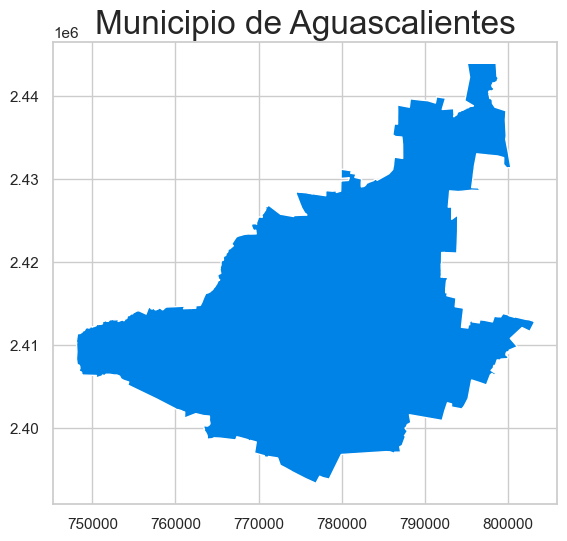

In [96]:
ags = gpd.read_file("../data/shp/ags/Aguascalientes.shp")
ags.plot(color ="#0083e6")
plt.title("Municipio de Aguascalientes", 
          fontsize = "24")

In [85]:
# Mapping
leaks_gdf = gpd.GeoDataFrame(leaks_trim, geometry = gpd.points_from_xy(leaks_trim["X"], leaks_trim["Y"]))

Text(0.5, 1.0, 'Localización de las fugas')

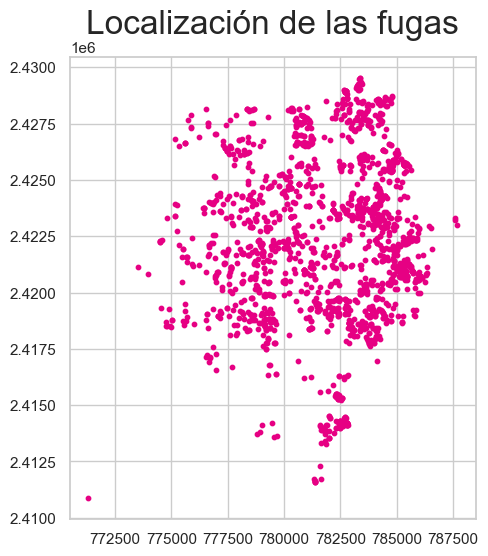

In [94]:
leaks_gdf.plot(markersize = 10, color = "#e60083")
plt.title("Localización de las fugas",
          fontsize = 24)

(770000.0, 790000.0, 2410000.0, 2430000.0)

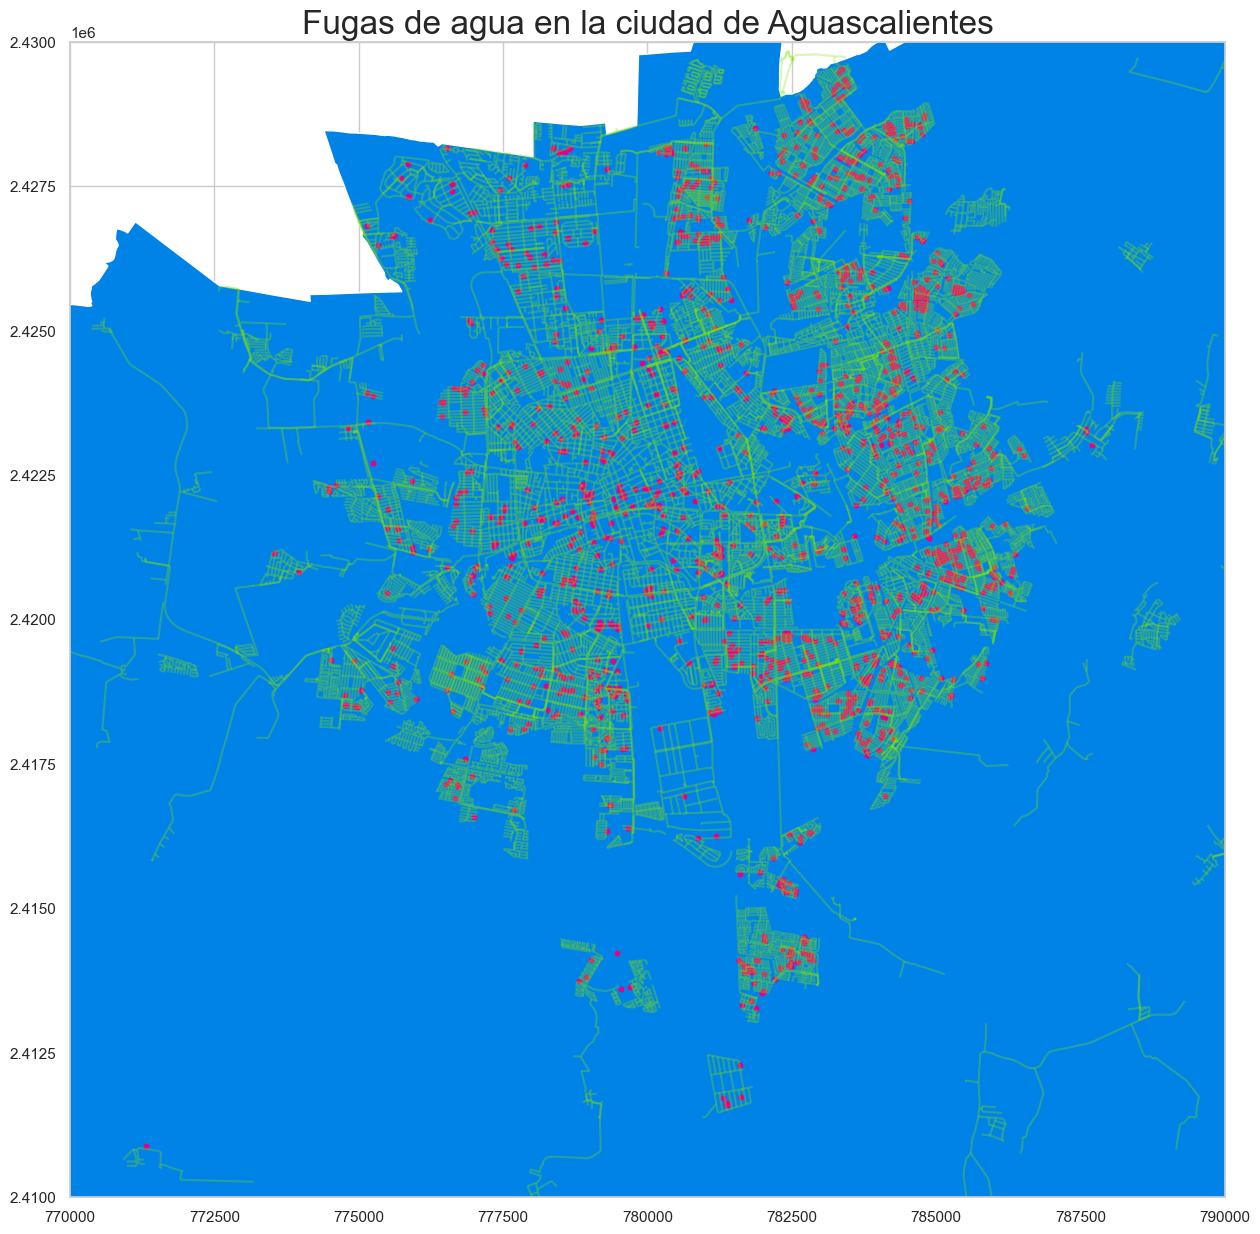

In [99]:
fig, ax = plt.subplots(figsize = (15, 15))
ags.plot(ax = ax, color = "#0083e6")
map_df_trim.plot(ax = ax, color = "#83e600", alpha = 0.3)
leaks_gdf.plot(ax = ax, color = "#e60083", markersize = 10)
plt.title("Fugas de agua en la ciudad de Aguascalientes",
          fontsize = 24)
plt.axis([770000, 790000, 2410000, 2430000])

# Imagen satelital

In [101]:
ee.Authenticate()


Successfully saved authorization token.


In [103]:
ee.Initialize()

In [111]:
leaks_trim["FECHALEGALIZACION"].max()
str(leaks_trim["FECHALEGALIZACION"].min())[:10]

'2022-12-01'

In [112]:
# Definir area de estudio

# Coordenadas
lat = 21.8833333
lon = -102.3

# Punto de interes
poi = ee.Geometry.Point(lon, lat)

# Periodo de tiempo
start_date = str(leaks_trim["FECHALEGALIZACION"].min())[:10]
end_date = str(leaks_trim["FECHALEGALIZACION"].max())[:10]

In [123]:
# Descarga de imagenes Sentinel 2 
sentinel = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")\
    .filterBounds(poi)\
    .filterDate(start_date, end_date)

# Cantidad de imagenes obtenidas
print("Imagenes totales:", sentinel.size().getInfo())

sentinel_list = sentinel.toList(sentinel.size())

Imagenes totales: 12


In [128]:
# Nuevos parametros para región de interés
parameters_roi = {
    "min":0,
    "max":3000,
    "dimensions":800, # Tamaño cuadrado en pixeles
    "bands": ["B4", "B3", "B2"], # (R, G, B)
    "region":poi.buffer(8000) # Region de interes
}

In [129]:
display(Image(url = ee.Image(sentinel_list.get(0)).getThumbURL(parameters_roi)))




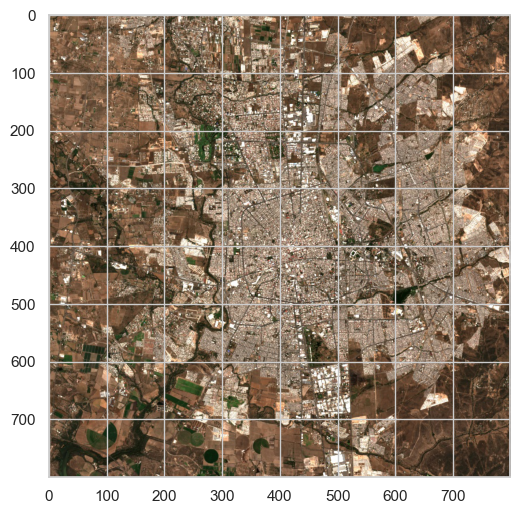

In [149]:
image_url = sentinel.first().getThumbUrl(parameters_roi)
image_np = np.array(PIL.Image.open(urllib.request.urlopen(image_url)))
image_np
plt.imshow(image_np)

In [179]:
img = ee.Image(sentinel_list.get(0))# .clip(poi.buffer(10000))
img_full = img.select(ee.List(["B4", "B3", "B2"]))
latlon = ee.Image.pixelLonLat().addBands(img_full)
latlon_new = latlon.reduceRegion(
  reducer=ee.Reducer.toList(),
  geometry=poi.buffer(10000),
  maxPixels=1e13,
  scale=10)

In [180]:
B = np.array((ee.Array(latlon_new.get("B2")).getInfo()))
G = np.array((ee.Array(latlon_new.get("B3")).getInfo()))
R = np.array((ee.Array(latlon_new.get("B4")).getInfo()))


lats = np.array((ee.Array(latlon_new.get("latitude")).getInfo()))
lons = np.array((ee.Array(latlon_new.get("longitude")).getInfo()))

In [181]:
img_full = np.vstack((R, G, B))

In [182]:
uniqueLats = np.unique(lats)
uniqueLons = np.unique(lons)
ncols = len(uniqueLons)    
nrows = len(uniqueLats)


ys = uniqueLats[1] - uniqueLats[0] 
xs = uniqueLons[1] - uniqueLons[0]

In [183]:
arr = np.zeros([nrows, ncols,len(img_full)], np.float32)
for z in range(0,len(arr[0][0]),1):
    counter =0
    for y in range(0,len(arr),1):
        for x in range(0,len(arr[0]),1):
            if lats[counter] == uniqueLats[y] and lons[counter] == uniqueLons[x] and counter < len(lats)-1:
                counter+=1
                arr[len(uniqueLats)-1-y,x,z] = img_full[z,counter]

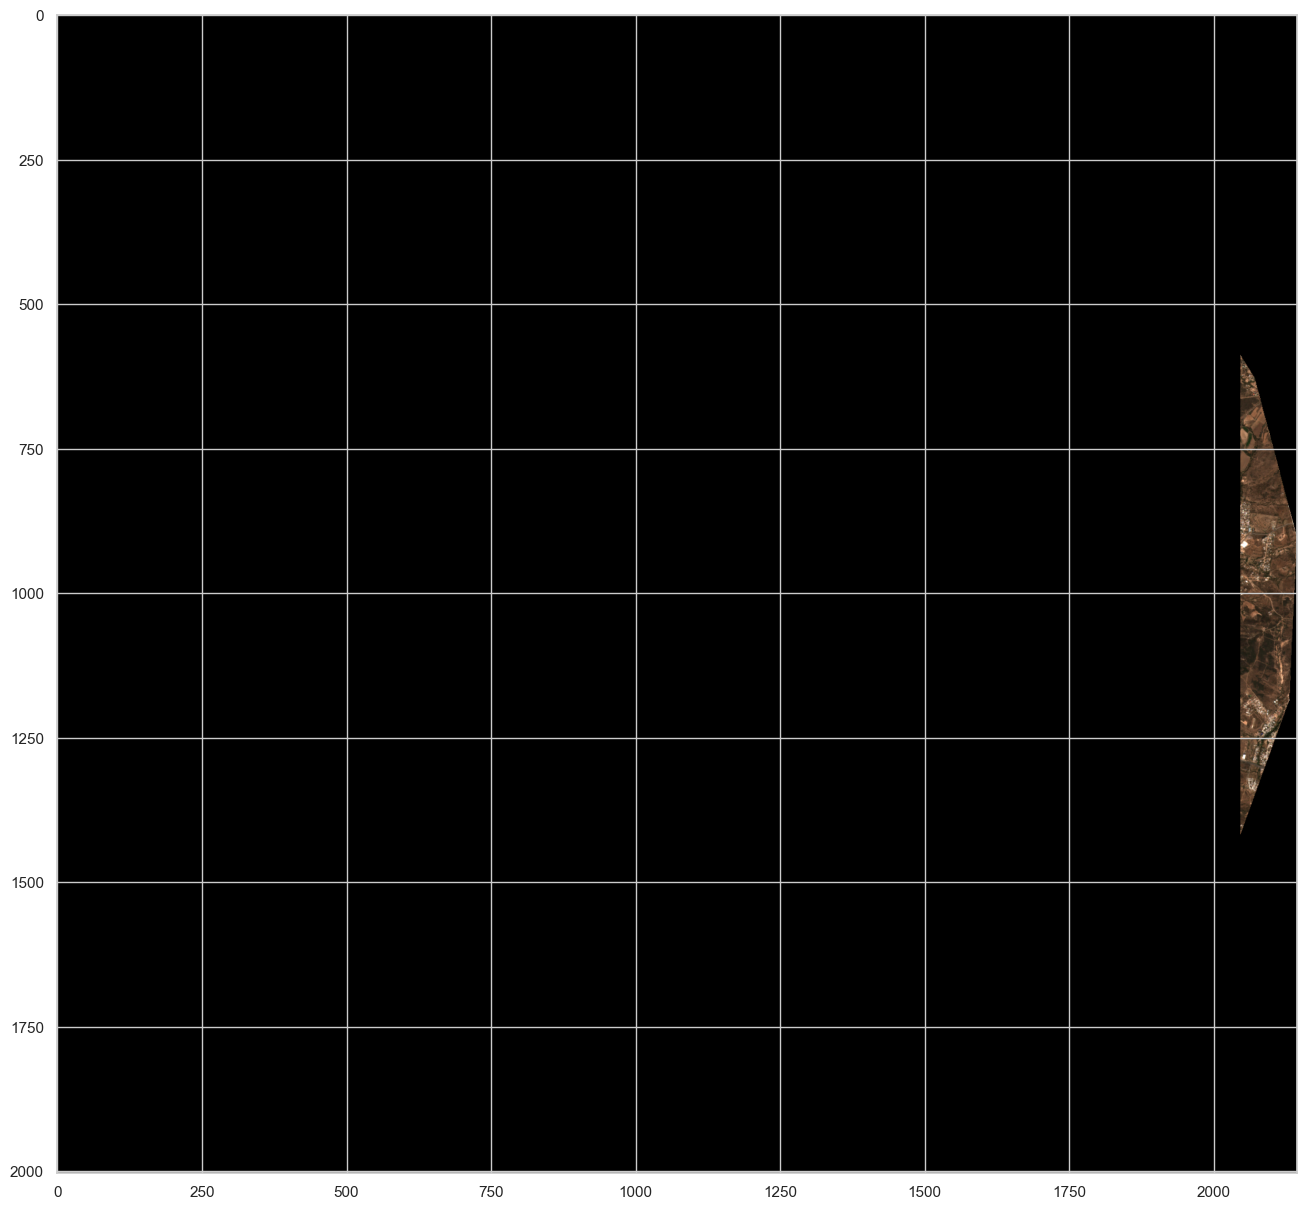

In [188]:
Arr_norm = cv2.convertScaleAbs(arr, alpha=(255.0/3000))
plt.figure(figsize=[16,16])
# plt.axis('off')
plt.imshow(Arr_norm[:,:,0:3])

In [191]:
lons

array([-102.2122444 , -102.2122444 , -102.2122444 , ..., -102.2125139 ,
       -102.21242407, -102.21233424])